In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sp/data_science_job.csv')
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020,Machine Learning Engineer (Remote),NaN,NaN,179769,179111,UK,NaN,CT,In-person,IN,NaN
4996,2021,Machine Learning Engineer (Remote),NaN,NaN,184642,196373,CN,NaN,FL,Remote,UK,NaN
4997,2022,Machine Learning Engineer,Analysis,GBP,135319,51366,UK,EN,FL,Hybrid,JP,M
4998,2021,Statistician,Data Science,EUR,58037,181817,US,MI,PT,Remote,DE,S


**Data Understanding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
work_year,0
job_title,0
job_category,500
salary_currency,500
salary,0
salary_in_usd,0
employee_residence,0
experience_level,500
employment_type,0
work_setting,0


In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data.sort_values(by='Percentage', ascending=False))

                    Missing Values  Percentage
job_category                   500        10.0
salary_currency                500        10.0
experience_level               500        10.0
company_size                   500        10.0
work_year                        0         0.0
job_title                        0         0.0
salary                           0         0.0
salary_in_usd                    0         0.0
employee_residence               0         0.0
employment_type                  0         0.0
work_setting                     0         0.0
company_location                 0         0.0


**Data cleaning**

In [4]:
df1=df.dropna()
df1

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4993,2021,Data Scientist (Remote),Analysis,EUR,44674,100031,UK,MI,FT,Hybrid,UK,M
4994,2020,Statistician,Data Science,GBP,115923,40047,JP,SE,CT,In-person,CN,L
4997,2022,Machine Learning Engineer,Analysis,GBP,135319,51366,UK,EN,FL,Hybrid,JP,M
4998,2021,Statistician,Data Science,EUR,58037,181817,US,MI,PT,Remote,DE,S


In [ ]:
df1.isnull().sum()

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,0
employment_type,0
work_setting,0


In [5]:
df1.job_title = df.job_title.str.replace(r'\(Remote\)|in office', '', regex=True).str.strip()

In [ ]:
df1.employee_residence.unique()

array(['US', 'JP', 'UK', 'DE', 'CN', 'MX', 'IN'], dtype=object)

In [ ]:
df1.company_location.unique()

array(['DE', 'IN', 'CN', 'MX', 'UK', 'JP', 'US'], dtype=object)

In [ ]:
df1.job_title.unique()

array(['Machine Learning Engineer', 'Statistician', 'Data Analyst',
       'Data Scientist', 'Data Engineer'], dtype=object)

In [ ]:
df1.job_category.unique()

array(['Analysis', 'ML/AI', 'Data Science', 'Engineering'], dtype=object)

In [ ]:
df1.experience_level.unique()

array(['MI', 'EX', 'SE', 'EN'], dtype=object)

In [ ]:
df1.employment_type.unique()

array(['CT', 'FL', 'FT', 'PT'], dtype=object)

In [ ]:
df1.company_size.unique()

array(['L', 'M', 'S'], dtype=object)

In [ ]:
df1.work_setting.unique()

array(['Remote', 'Hybrid', 'In-person'], dtype=object)

In [6]:
df1.drop(['work_year','salary','salary_currency','employee_residence','company_size'],axis=1,inplace=True)

In [7]:
df1

,job_title,job_category,salary_in_usd,experience_level,employment_type,work_setting,company_location
0,Machine Learning Engineer,Analysis,136086,MI,CT,Remote,DE
1,Statistician,ML/AI,67982,EX,FL,Remote,IN
2,Machine Learning Engineer,ML/AI,153309,MI,CT,Hybrid,CN
3,Data Analyst,ML/AI,135242,SE,FT,Hybrid,MX
4,Statistician,Data Science,35156,MI,FT,In-person,UK
...,...,...,...,...,...,...,...
4993,Data Scientist,Analysis,100031,MI,FT,Hybrid,UK
4994,Statistician,Data Science,40047,SE,CT,In-person,CN
4997,Machine Learning Engineer,Analysis,51366,EN,FL,Hybrid,JP
4998,Statistician,Data Science,181817,MI,PT,Remote,DE


In [ ]:
df1.job_title.value_counts()

,count
job_title,
Data Engineer,965
Data Analyst,898
Statistician,896
Data Scientist,892
Machine Learning Engineer,849


In [ ]:
df1.job_category.value_counts()

,count
job_category,
Data Science,1173
ML/AI,1151
Analysis,1108
Engineering,1068


In [ ]:
df1.experience_level.value_counts()

,count
experience_level,
SE,1154
EX,1119
EN,1115
MI,1112


In [ ]:
df1.employment_type.value_counts()

,count
employment_type,
FL,1147
PT,1129
FT,1116
CT,1108


In [ ]:
df1.work_setting.value_counts()

,count
work_setting,
Hybrid,1562
In-person,1487
Remote,1451


In [ ]:
df1.company_location.value_counts()

,count
company_location,
UK,728
DE,653
CN,633
IN,630
MX,630
US,615
JP,611


**Descriptive Statistics or Exploratory Data Analysis**

In [8]:
continous=['salary_in_usd']
discerete_categorical=['job_title','job_category','experience_level','employment_type','work_setting','company_location']

In [ ]:
df1[continous].describe()

,salary_in_usd
count,4500.000000
mean,113756.052444
std,49154.409212
min,30016.000000
25%,70991.500000
50%,113521.500000
75%,156294.750000
max,199985.000000


In [ ]:
df1[continous].skew()

,0
salary_in_usd,0.028555


In [ ]:
df1[discerete_categorical].describe()

,job_title,job_category,experience_level,employment_type,work_setting,company_location
count,4500,4500,4500,4500,4500,4500
unique,5,4,4,4,3,7
top,Data Engineer,Data Science,SE,FL,Hybrid,UK
freq,965,1173,1154,1147,1562,728


In [ ]:
c_m=df1[continous].corr()
c_m

,salary_in_usd
salary_in_usd,1.0


**Analysis**

In [ ]:
Job_category_salary= df1.groupby('job_category')['salary_in_usd'].mean()
Job_category_salary

,salary_in_usd
job_category,
Analysis,113859.608303
Data Science,113607.682012
Engineering,113639.090824
ML/AI,113916.099044


In [ ]:
job_title_salary= df1.groupby('job_title')['salary_in_usd'].mean()
job_title_salary

,salary_in_usd
job_title,
Data Analyst,113952.993318
Data Engineer,112816.872539
Data Scientist,113505.558296
Machine Learning Engineer,113277.702002
Statistician,115272.811384


In [ ]:
experience_level_salary= df1.groupby('experience_level')['salary_in_usd'].mean()
experience_level_salary

,salary_in_usd
experience_level,
EN,115287.299552
EX,113394.849866
MI,113389.446043
SE,112980.065858


In [ ]:
company_location_salary= df1.groupby('company_location')['salary_in_usd'].mean()
company_location_salary

,salary_in_usd
company_location,
CN,111684.788310
DE,112797.197550
IN,114262.196825
JP,115907.705401
MX,114558.887302
UK,113413.175824
US,113833.352846


In [ ]:
work_setting_salary= df1.groupby('work_setting')['salary_in_usd'].mean()
work_setting_salary

,salary_in_usd
work_setting,
Hybrid,113531.743918
In-person,115218.491594
Remote,112498.797381


In [ ]:
empolyee_type_salary= df1.groupby('employment_type')['salary_in_usd'].mean()
empolyee_type_salary

,salary_in_usd
employment_type,
CT,113687.924188
FL,114366.034874
FT,111398.500896
PT,115533.611160


In [ ]:
pd.crosstab(df1.job_title,df1.job_category,margins=True)

job_category,Analysis,Data Science,Engineering,ML/AI,All
job_title,,,,,
Data Analyst,210,245,210,233,898
Data Engineer,230,262,198,275,965
Data Scientist,215,228,225,224,892
Machine Learning Engineer,220,215,207,207,849
Statistician,233,223,228,212,896
All,1108,1173,1068,1151,4500


**1.Filter for Data Science Jobs**

In [9]:
data_science_jobs = df1[df1['job_category'] == 'Data Science']
print(data_science_jobs.shape)

(1173, 7)


**2.Salary Exploration**

2.1 Descriptive Statistics for Salaries

In [ ]:
salary_stats = data_science_jobs['salary_in_usd'].describe()
print(salary_stats)

count      1173.000000
mean     113607.682012
std       49652.146701
min       30016.000000
25%       69906.000000
50%      113554.000000
75%      156662.000000
max      199985.000000
Name: salary_in_usd, dtype: float64


2.2 Visualize Salary Distribution

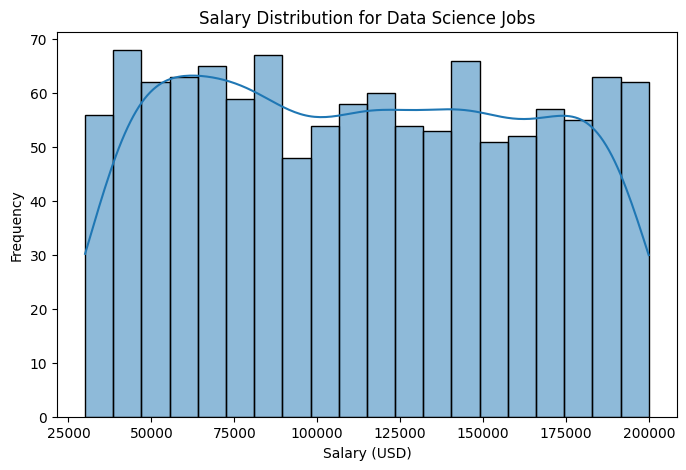

In [ ]:
# Histogram for salary distribution
plt.figure(figsize=(8, 5))
sns.histplot(data_science_jobs['salary_in_usd'], bins=20, kde=True)
plt.title('Salary Distribution for Data Science Jobs')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

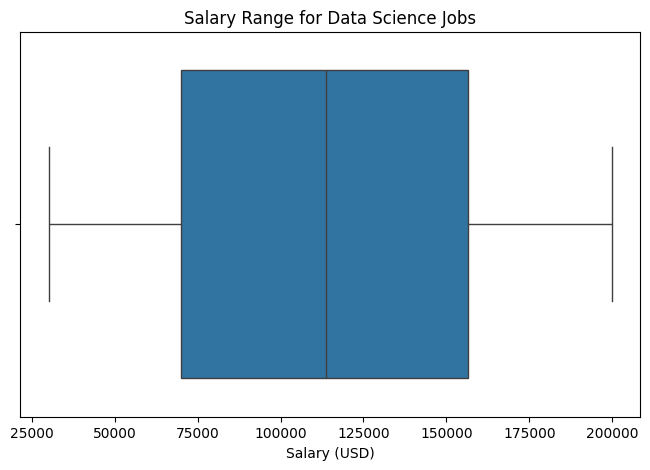

In [ ]:
# Box plot for salary
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_science_jobs['salary_in_usd'])
plt.title('Salary Range for Data Science Jobs')
plt.xlabel('Salary (USD)')
plt.show()

2.3 Salaries by Experience Level

In [ ]:
experience_salary = data_science_jobs.groupby('experience_level')['salary_in_usd'].mean()
experience_salary

,salary_in_usd
experience_level,
EN,117871.708029
EX,109075.812500
MI,111746.338028
SE,115642.718654


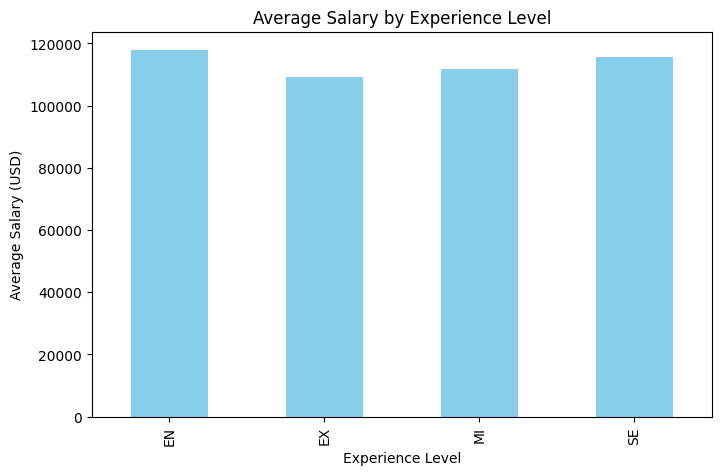

In [ ]:
# Bar plot for experience salary
experience_salary.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Average Salary by Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xlabel('Experience Level')
plt.show()

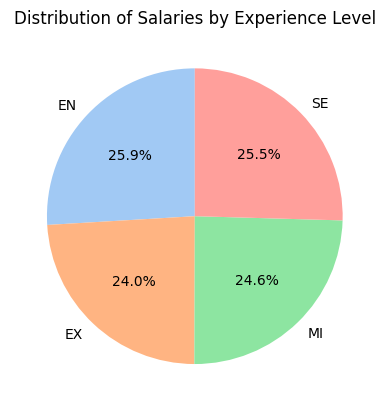

In [ ]:
# Pie plot for experience salary
plt.pie(experience_salary, labels=experience_salary.index, autopct='%1.1f%%',startangle=90,colors=sns.color_palette('pastel'))
plt.title('Distribution of Salaries by Experience Level')
plt.show()

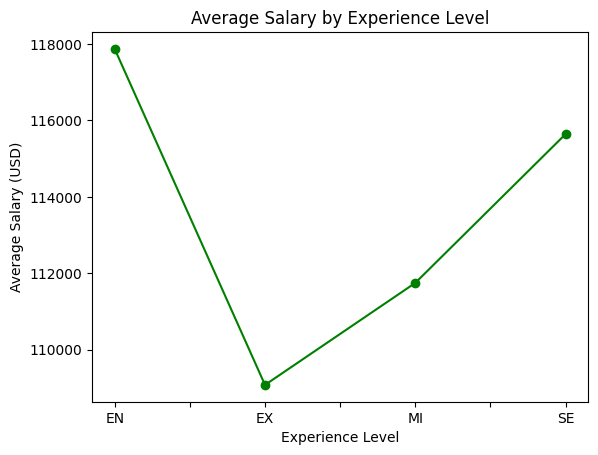

In [ ]:
# Line plot for experience salary
experience_salary.plot(kind='line', marker='o', color='green')
plt.title('Average Salary by Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xlabel('Experience Level')
plt.show()

2.4 Salary vs Work Setting

In [61]:
work_setting_salary = data_science_jobs.groupby('work_setting')['salary_in_usd'].mean()
work_setting_salary

,salary_in_usd
work_setting,
Hybrid,116276.772397
In-person,111700.835052
Remote,112633.279570


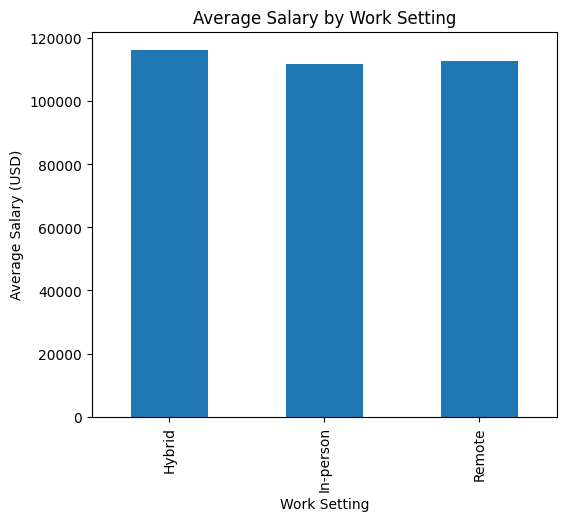

In [62]:
# Bar plot for Average Salary by Work Setting
work_setting_salary.plot(kind='bar',  figsize=(6, 5))
plt.title('Average Salary by Work Setting')
plt.xlabel('Work Setting')
plt.ylabel('Average Salary (USD)')
plt.show()

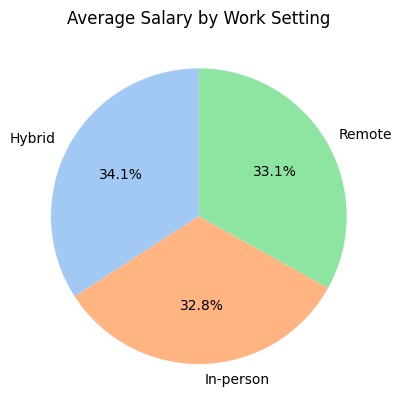

In [63]:
# Pie plot for Average Salary by Work Setting
plt.pie(work_setting_salary, labels=work_setting_salary.index, autopct='%1.1f%%',startangle=90,colors=sns.color_palette('pastel'))
plt.title('Average Salary by Work Setting')
plt.show()

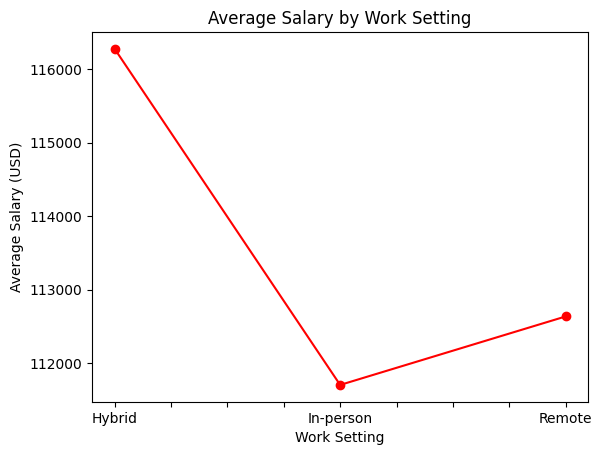

In [64]:
# Line plot for Average Salary by Work Setting
work_setting_salary.plot(kind='line', marker='o', color='red')
plt.title('Average Salary by Work Setting')
plt.xlabel('Work Setting')
plt.ylabel('Average Salary (USD)')
plt.show()

2.5 Salary vs Employment Type

In [65]:
employment_salary = data_science_jobs.groupby('employment_type')['salary_in_usd'].mean()
employment_salary

,salary_in_usd
employment_type,
CT,112384.304762
FL,110237.212014
FT,113319.524138
PT,118599.866667


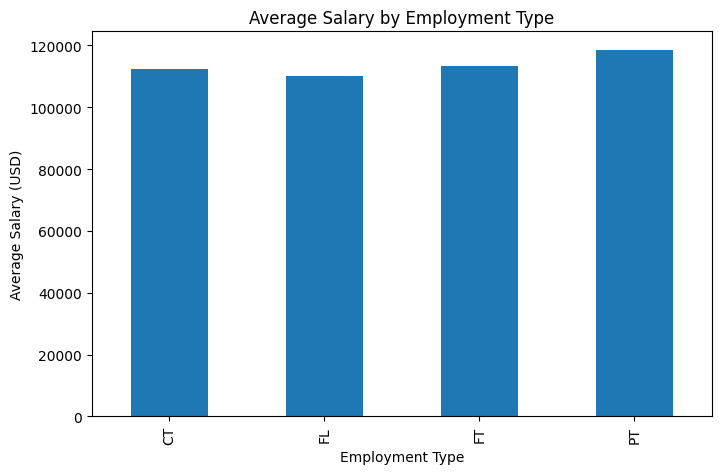

In [66]:
# Bar plot for Average Salary by Employment Type
employment_salary.plot(kind='bar', figsize=(8, 5))
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.show()

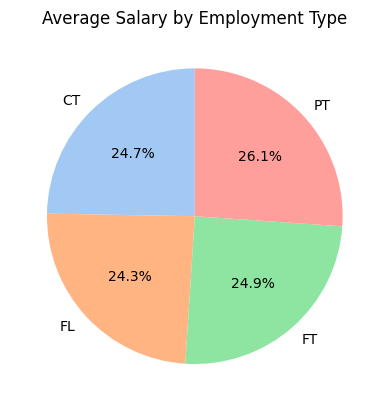

In [67]:
# Pie plot for Average Salary by Employment Type
plt.pie(employment_salary, labels=employment_salary.index, autopct='%1.1f%%',startangle=90,colors=sns.color_palette('pastel'))
plt.title('Average Salary by Employment Type')
plt.show()

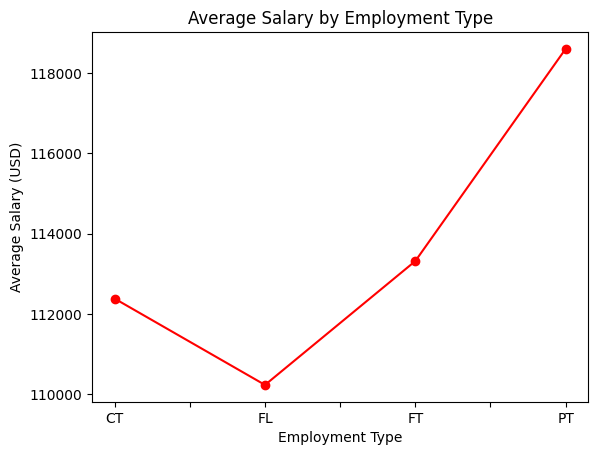

In [68]:
# Line plot for Average Salary by Employment Type
employment_salary.plot(kind='line', marker='o', color='red')
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.show()

**3.Skills Analysis**

3.1 Map Job Titles to Inferred Skill

In [12]:
job_to_skills = {'Data Scientist': ['Python', 'R', 'SQL', 'Machine Learning', 'Deep Learning', 'Data Visualization'],
    'Machine Learning Engineer': ['Python', 'Machine Learning', 'Deep Learning', 'TensorFlow', 'Keras'],
    'Statistician': ['R', 'Statistical Modeling', 'Data Analysis', 'Python'],
    'Data Analyst': ['SQL', 'Data Visualization', 'Excel', 'Python']}

In [14]:
# Function to map job titles to skills
def map_skills(job_title):
    skills = []
    for title, skill_list in job_to_skills.items():
        if title in job_title:
            skills.extend(skill_list)
    return list(set(skills))

In [28]:
df1['skills'] = df1['job_title'].apply(map_skills)

In [29]:
print(df1[['job_title', 'skills']].head())

                   job_title  \
0  Machine Learning Engineer   
1               Statistician   
2  Machine Learning Engineer   
3               Data Analyst   
4               Statistician   

                                              skills  
0  [Keras, TensorFlow, Python, Deep Learning, Mac...  
1   [Statistical Modeling, Data Analysis, Python, R]  
2  [Keras, TensorFlow, Python, Deep Learning, Mac...  
3           [Excel, SQL, Data Visualization, Python]  
4   [Statistical Modeling, Data Analysis, Python, R]  


3.2 Visualize the Most Common Skills

In [30]:
all_skills = [skill for skills_list in df1['skills'] for skill in skills_list]
skills_count = pd.Series(all_skills).value_counts()
print("Most Common Skills:")
print(skills_count)

Most Common Skills:
Python                  3535
SQL                     1790
Data Visualization      1790
R                       1788
Deep Learning           1741
Machine Learning        1741
Excel                    898
Statistical Modeling     896
Data Analysis            896
Keras                    849
TensorFlow               849
Name: count, dtype: int64


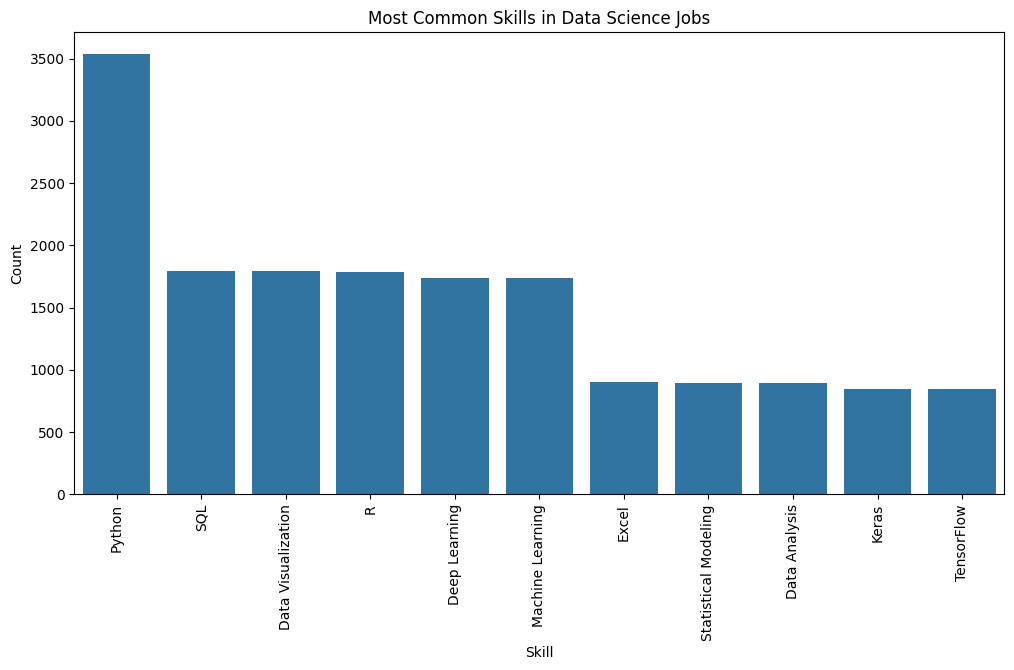

In [48]:
# Plot the most common skills
plt.figure(figsize=(12, 6))
sns.barplot(x=skills_count.index, y=skills_count.values)
plt.title('Most Common Skills in Data Science Jobs')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

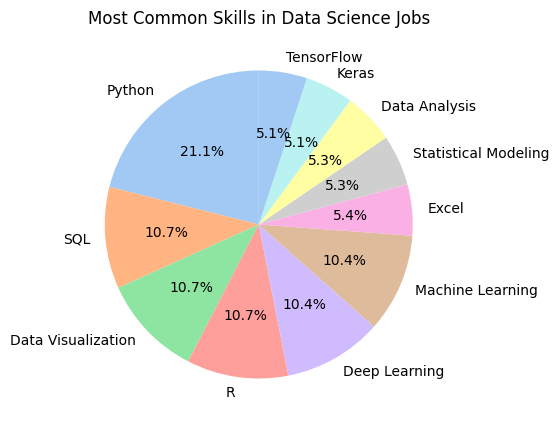

In [71]:
# Pie plot for most common skills
plt.figure(figsize=(5,5))
plt.pie(skills_count, labels=skills_count.index, autopct='%1.1f%%',startangle=90,colors=sns.color_palette('pastel'))
plt.title('Most Common Skills in Data Science Jobs')
plt.show()

3.2 Visualize the Skills by Experience Level

In [34]:
# Calculate the frequency of skills by experience level
skills_by_experience = df1.explode('skills').groupby(['experience_level', 'skills']).size().unstack(fill_value=0)
print("Skills by Experience Level:")
print(skills_by_experience)

Skills by Experience Level:
skills            Data Analysis  Data Visualization  Deep Learning  Excel  \
experience_level                                                            
EN                          219                 469            440    231   
EX                          219                 436            437    213   
MI                          220                 446            422    227   
SE                          238                 439            442    227   

skills            Keras  Machine Learning  Python    R  SQL  \
experience_level                                              
EN                  202               440     890  457  469   
EX                  214               437     869  442  436   
MI                  203               422     869  439  446   
SE                  230               442     907  450  439   

skills            Statistical Modeling  TensorFlow  
experience_level                                    
EN                      

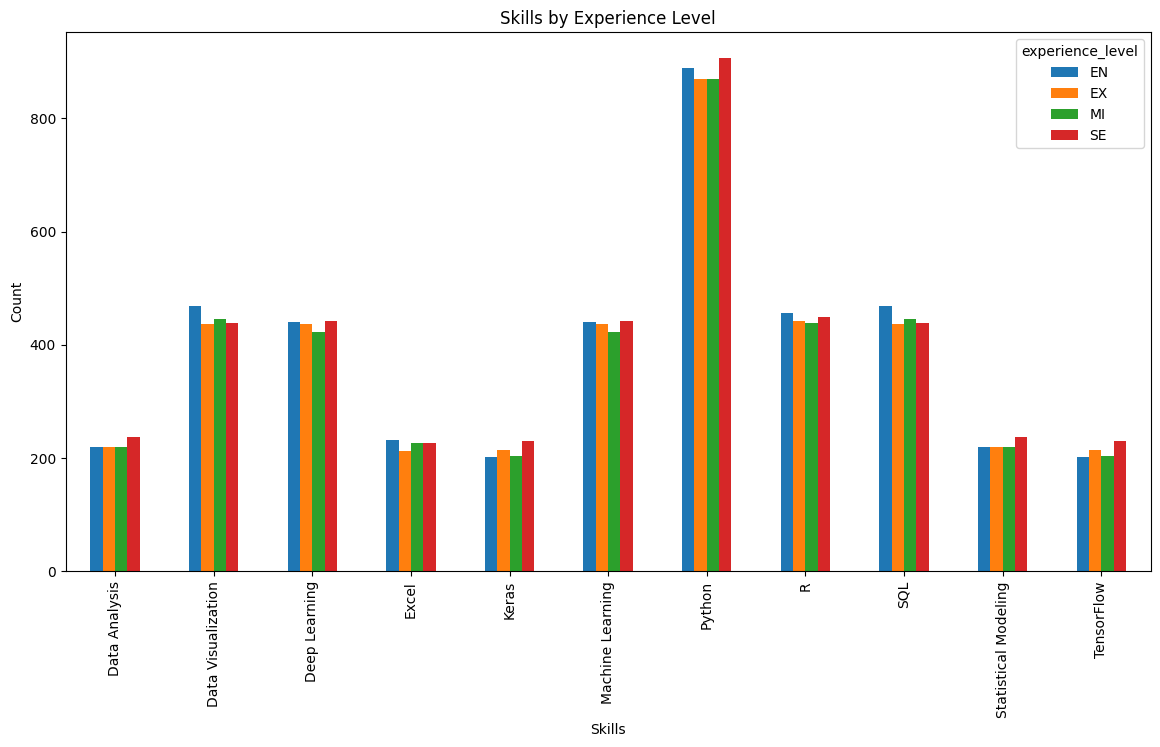

In [46]:
# Plot skills by experience level
skills_by_experience.T.plot(kind='bar', stacked=False, figsize=(14, 7))
plt.title('Skills by Experience Level')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

3.3 Visualize the Skills by Work Setting

In [38]:
# Exploring Skills by Work Setting
skills_by_work_setting = df1.explode('skills').groupby(['work_setting', 'skills']).size().unstack(fill_value=0)

print("Skills by Work Setting:")
print(skills_by_work_setting)

Skills by Work Setting:
skills        Data Analysis  Data Visualization  Deep Learning  Excel  Keras  \
work_setting                                                                   
Hybrid                  310                 615            584    333    302   
In-person               276                 604            593    294    283   
Remote                  310                 571            564    271    264   

skills        Machine Learning  Python    R  SQL  Statistical Modeling  \
work_setting                                                             
Hybrid                     584    1227  592  615                   310   
In-person                  593    1163  586  604                   276   
Remote                     564    1145  610  571                   310   

skills        TensorFlow  
work_setting              
Hybrid               302  
In-person            283  
Remote               264  


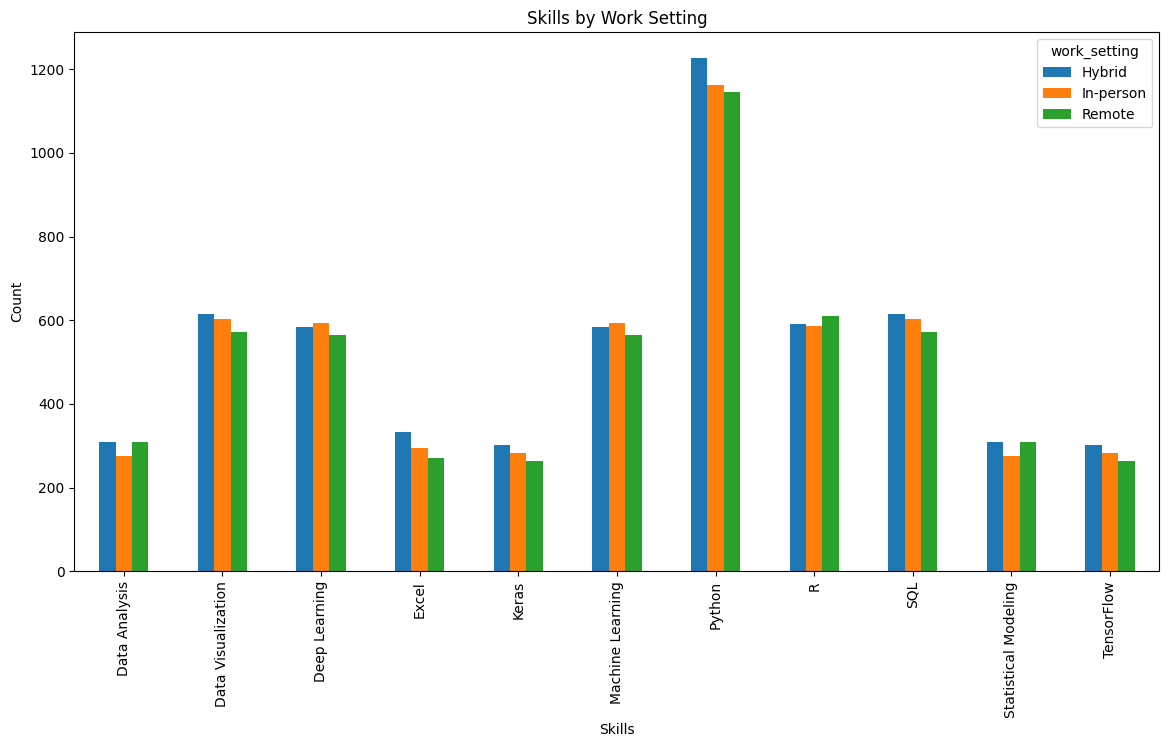

In [47]:
# Plot skills by work setting
skills_by_work_setting.T.plot(kind='bar', stacked=False, figsize=(14, 7))
plt.title('Skills by Work Setting')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

3.3 Correlate Skills with Salaries

In [40]:
# Salary by Skills
skills_salary = df1.explode('skills').groupby('skills')['salary_in_usd'].mean().sort_values(ascending=False)

print("Average Salary by Skill:")
print(skills_salary)

Average Salary by Skill:
skills
Data Analysis           115272.811384
Statistical Modeling    115272.811384
R                       114391.161633
Python                  114012.433946
Excel                   113952.993318
Data Visualization      113730.025698
SQL                     113730.025698
Deep Learning           113394.443998
Machine Learning        113394.443998
Keras                   113277.702002
TensorFlow              113277.702002
Name: salary_in_usd, dtype: float64


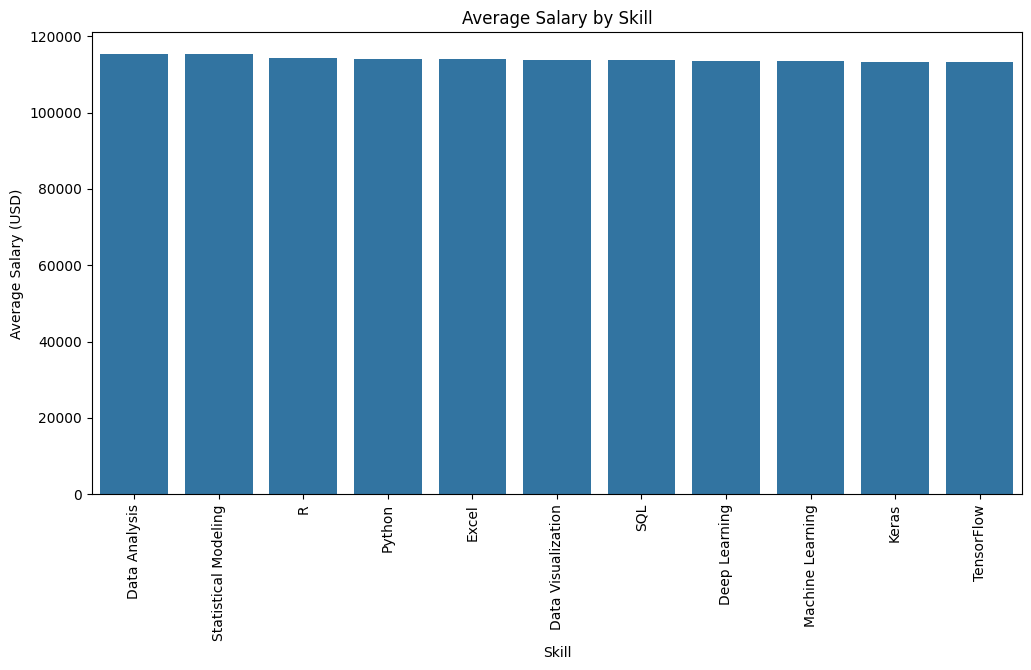

In [53]:
# Plot salary by skill
plt.figure(figsize=(12, 6))
sns.barplot(x=skills_salary.index, y=skills_salary.values)
plt.title('Average Salary by Skill')
plt.xlabel('Skill')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=90)
plt.show()

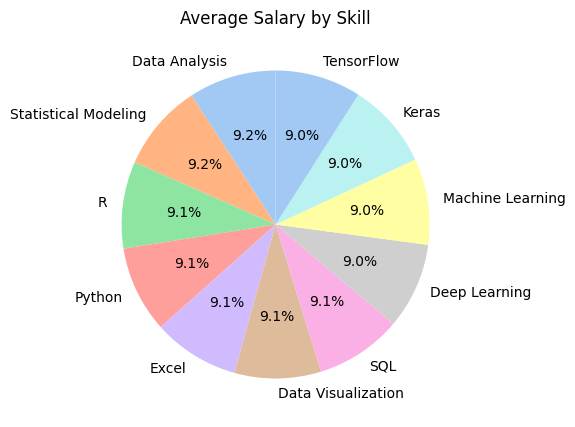

In [70]:
# Pie plot salary by skill
plt.figure(figsize=(5,5))
plt.pie(skills_salary, labels=skills_salary.index, autopct='%1.1f%%',startangle=90,colors=sns.color_palette('pastel'))
plt.title('Average Salary by Skill')
plt.show()

**4.Location Analysis**

4.1 Job Distribution by Location

In [ ]:
location_counts = data_science_jobs['company_location'].value_counts()
location_counts

,count
company_location,
UK,206
IN,173
JP,168
DE,166
CN,164
MX,157
US,139


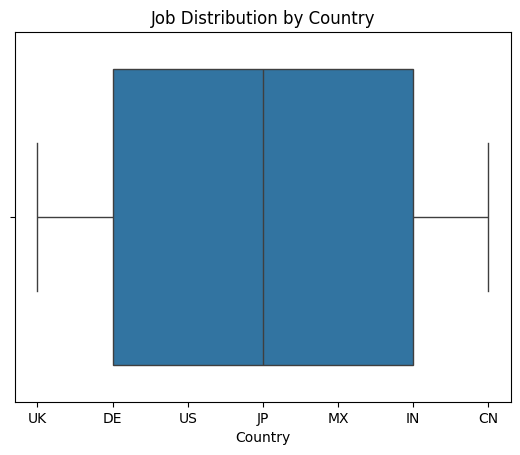

In [ ]:
# Box plot for Job Distribution by Country
sns.boxplot(x=data_science_jobs['company_location'])
plt.title('Job Distribution by Country')
plt.xlabel('Country')
plt.show()


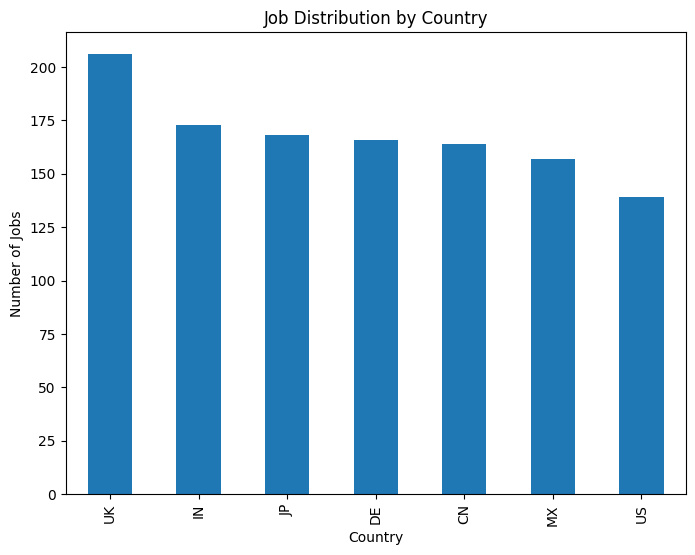

In [ ]:
# Barplot for Job Distribution by Country
location_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Job Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Jobs')
plt.show()

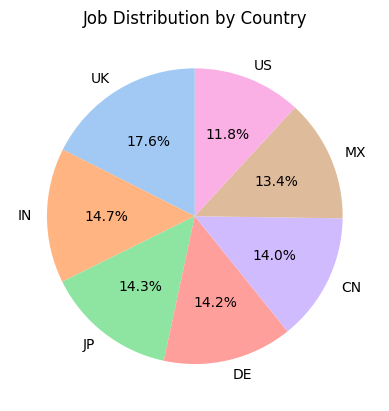

In [ ]:
# Pie plot for Job Distribution by Country
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%',startangle=90,colors=sns.color_palette('pastel'))
plt.title('Job Distribution by Country')
plt.show()

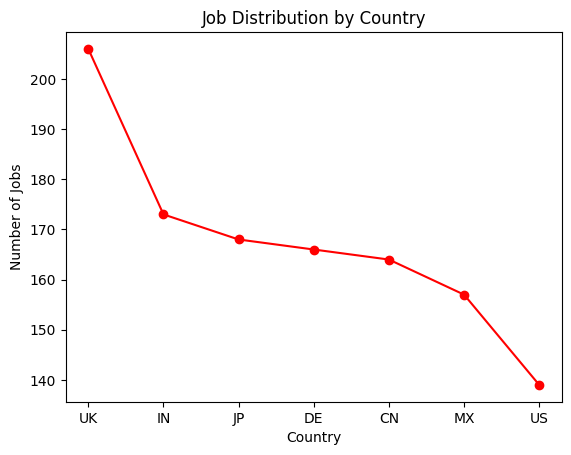

In [ ]:
# Lineplot for Job Distribution by Country
location_counts.plot(kind='line', marker='o', color='red')
plt.title('Job Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Jobs')
plt.show()

4.2 Salaries by Country

In [ ]:
location_salary = data_science_jobs.groupby('company_location')['salary_in_usd'].mean()
location_salary

,salary_in_usd
company_location,
CN,114461.121951
DE,111553.867470
IN,112204.994220
JP,113816.339286
MX,117502.331210
UK,113246.689320
US,112683.107914


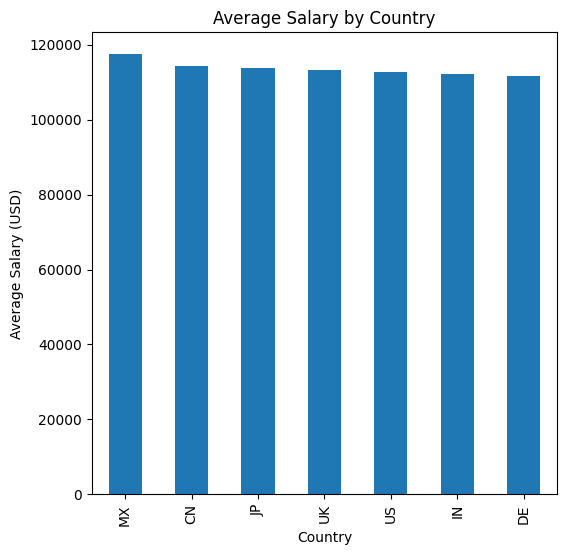

In [ ]:
# Bar plot for Average Salary by Country
location_salary.sort_values(ascending=False).plot(kind='bar', figsize=(6, 6))
plt.title('Average Salary by Country')
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.show()

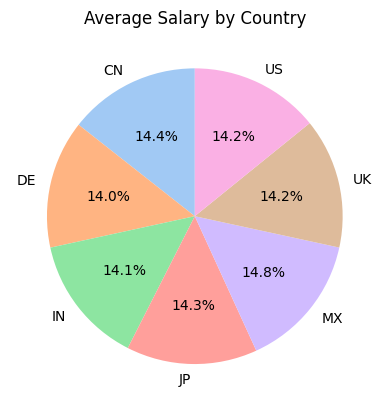

In [ ]:
# Pie plot for Average Salary by Country
plt.pie(location_salary, labels=location_salary.index, autopct='%1.1f%%',startangle=90,colors=sns.color_palette('pastel'))
plt.title('Average Salary by Country')
plt.show()

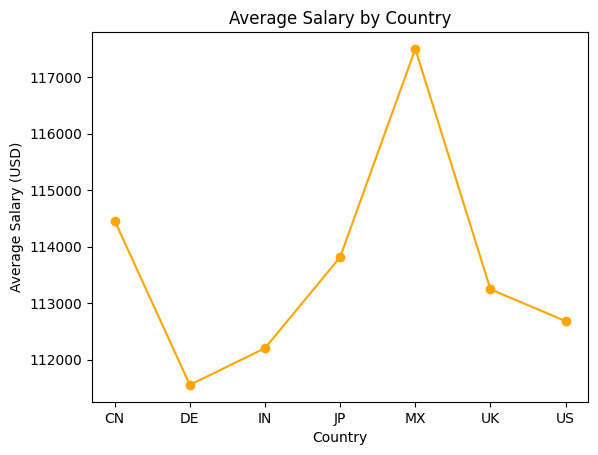

In [ ]:
# Line plot for Average Salary by Country
location_salary.plot(kind='line', marker='o', color='orange')
plt.title('Average Salary by Country')
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.show()